[참고원본사이트](https://www.datamanim.com/dataset/03_dataq/main_p1.html)
# 작업형 제 1유형 예시문제

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/dataq/main/mtcars.csv', index_col= 0)

## 1. **mtcars 데이터셋(mtcars.csv)의 qsec 컬럼을 최소 최대 척도(min-max scale)로 변환한 후 0.5보다 큰 값을 가지는 레코드 수를 구하시오.**

In [14]:
#방법 1
from sklearn.preprocessing import MinMaxScaler
minmax_sc = MinMaxScaler()
minmax_sc.fit(df[['qsec']])
scaled = minmax_sc.transform(df[['qsec']])
len(scaled[[scaled >0.5]])

C:\Users\aj878\AppData\Local\Temp/ipykernel_19748/2477930392.py:5: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  len(scaled[[scaled >0.5]])


9

In [21]:
# 방법 2
X = df['qsec']
# X_MinMax =(X - X.min(axis =0))/(X.max(axis=0) - X.min(axis=0))
X_MinMax = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

len(X_MinMax[X_MinMax>0.5])


9

## 2. **mtcars 데이터셋(mtcars.csv)의 qsec 컬럼을 표준정규분포 데이터 표준화 (standardization) 변환 후 최대, 최소값을 각각 구하시오.**


In [23]:
# 방법 1
from sklearn.preprocessing import StandardScaler
sts =StandardScaler()
sts.fit(df[['qsec']])
scaled_sts = sts.transform(df[['qsec']])
print('min:',scaled_sts.min())
print('max:',scaled_sts.max())

min: -1.9039963517625231
max: 2.8719855384368587


In [27]:
# 방법 2
mean = df.qsec.mean()
std = df.qsec.std()
scale = (df.qsec-mean)/std

Max = max(scale)
Min = min(scale)
print(Max,Min)

2.826754592962484 -1.8740102832334835


## 3. **mtcars 데이터셋(mtcars.csv)의 wt 컬럼의 이상치(IQR *1.5 외부에 존재하는)값들을 outlier 변수에 저장하라**


In [30]:
Q3= df.wt.quantile(0.75)
Q1 = df.wt.quantile(0.25)
IQR = Q3 - Q1
outlier = df.wt[(df.wt >= Q3 + IQR *1.5) |(df.wt <= Q1 - IQR *1.5) ]

In [31]:
outlier

Cadillac Fleetwood     5.250
Lincoln Continental    5.424
Chrysler Imperial      5.345
Name: wt, dtype: float64

## 4. **mtcars 데이터셋에서 mpg변수와 나머지 변수들의 상관계수를 구하여 내림차순 정렬하여 표현하라**

In [36]:
df.corr()[['mpg']][1:].sort_values('mpg', ascending = False)

,mpg
drat,0.681172
vs,0.664039
am,0.599832
gear,0.480285
qsec,0.418684
carb,-0.550925
hp,-0.776168
disp,-0.847551
cyl,-0.852162
wt,-0.867659


## 5. **mtcars 데이터셋에서 mpg변수를 제외하고 데이터 정규화 (standardscaler) 과정을 진행한 이후 PCA를 통해 변수 축소를 하려한다. 누적설명 분산량이 92%를 넘기기 위해서는 몇개의 주성분을 선택해야하는지 설명하라**

In [43]:
df2 = df[df.columns[1:]]
sts = StandardScaler()
sts.fit(df2)
scaled_sts_df2 = sts.transform(df2)
# standard 스케일 완료

In [76]:
# PCA 진행
# PCA에 n_components 지정
from sklearn.decomposition import PCA
componentNum =10
pca = PCA(n_components =componentNum)
printcipalComponents = pca.fit_transform(scaled_sts_df2)
printcipalDf = pd.DataFrame(data = printcipalComponents, columns = ['component' + str(x) for x in range(componentNum)])

In [77]:
componentDf = pd.DataFrame(pca.explained_variance_ratio_, columns =['cumsumVariance']).cumsum().reset_index()
componentDf['index'] +=1
componentDf = componentDf.rename(columns = {'index':'componentCount'})

In [78]:
componentDf

,componentCount,cumsumVariance
0,1,0.576022
1,2,0.840986
2,3,0.900708
3,4,0.927658
4,5,0.949883
5,6,0.970895
6,7,0.984187
7,8,0.992255
8,9,0.997620
9,10,1.000000


### 6. **mtcars 의 index는 (업체명) - (모델명)으로 구성된다. (valiant는 업체명) mtcars에 'brand' 컬럼을 추가하고 value 값으로 업체명을 입력하라**


In [99]:
df['brand'] = list(pd.DataFrame(list(df.index.str.split(' ')))[0])
# df['brand'] = pd.DataFrame(list(df.index.str.split(" ")))[0].values

In [100]:
df.head(3)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,brand
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,Mazda
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,Mazda
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,Datsun


### 7. **추가된 brand 컬럼을 제외한 모든 컬럼을 통해 pca를 실시한다. 2개의 주성분과 brand컬럼으로 구성된 새로운 데이터 프레임을 출력하고, brand에 따른 2개 주성분을 시각화하여라 (brand를 구분 할수 있도록 색이다른 scatterplot, legend를 표시한다)**

In [106]:
not_brand = df[df.columns[:-1]]

# 2개의 주성분
componentnum =2
pca =PCA(n_components = componentnum)
printcipalComponents = pca.fit_transform(not_brand)
nb_pcadf = pd.DataFrame(data=printcipalComponents, columns=['component'+str(x) for x in range(componentnum)])

nb_pcadf['brand'] = list(df['brand'])

In [107]:
nb_pcadf.head(3)


,component0,component1,brand
0,-79.596425,-2.132241,Mazda
1,-79.598570,-2.147487,Mazda
2,-133.894096,5.057570,Datsun


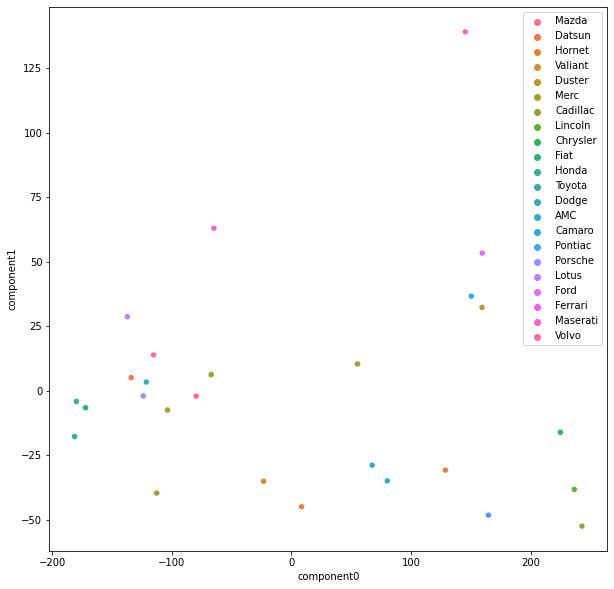

In [118]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.scatterplot(x='component0', y='component1', hue = 'brand',data=nb_pcadf)
plt.legend()
plt.show()